In [78]:
import pandas as pd
wine_ori = pd.read_csv('https://bit.ly/wine-date')

In [79]:
def remove_outliers_iqr_all_columns(df):
    df_clean = df.copy()
    for col in df_clean.columns:
        if col == 'class':
            print('pass')
            continue
        if pd.api.types.is_numeric_dtype(df_clean[col]):  # 숫자형 컬럼만 처리
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

wine_rmo =remove_outliers_iqr_all_columns(wine_ori)

pass


In [80]:
target_rmo = wine_rmo[['class']]
wine_rmo = wine_rmo[['alcohol', 'sugar', 'pH']]

target = wine_ori[['class']]
wine = wine_ori[['alcohol', 'sugar', 'pH']]

In [ ]:
#스케일링
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
wine = scaler_std.fit_transform(wine)
wine_rmo = scaler_std.fit_transform(wine_rmo)
scaler_std.tra

In [82]:
from sklearn.model_selection import train_test_split

tr_in , te_in , tr_tar , te_tar = train_test_split(wine, target, stratify=target)
tr_in_r , te_in_r , tr_tar_r , te_tar_r = train_test_split(wine_rmo, target_rmo, stratify=target_rmo)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr1 = LogisticRegression()
lr1.fit(tr_in, tr_tar)
lr2 = LogisticRegression()
lr2.fit(tr_in_r, tr_tar_r)
print('이상치 제거 전')
print(accuracy_score(lr1.predict(tr_in), tr_tar))
print(accuracy_score(lr1.predict(te_in), te_tar))
print()
print('이상치 제거 후')
print(accuracy_score(lr2.predict(tr_in_r), tr_tar_r))
print(accuracy_score(lr2.predict(te_in_r), te_tar_r))

이상치 제거 전
0.7811986863711001
0.7815384615384615

이상치 제거 후
0.7808335096255553
0.7817258883248731


/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
payload = {
    'scaler' : scaler_std,
    'model' : lr2
}

In [91]:
import pickle 
with open("./model.pkl", "wb") as f:
    pickle.dump(payload, f)

In [85]:
tr_in_r


array([[ 2.28246379, -0.57585039,  1.60629716],
       [-0.59761051, -0.85134768,  0.29217912],
       [ 0.75771857, -0.85134768,  1.60629716],
       ...,
       [-0.00465404,  0.41134824, -0.4962917 ],
       [-0.85173472, -0.13964634,  0.68641454],
       [ 1.85892345, -0.46105985,  0.02935552]], shape=(4727, 3))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
target_dt = wine_ori[['class']]
wine_dt = wine_ori[['alcohol', 'sugar', 'pH']]

In [94]:
train_X , test_x , train_y , test_y = train_test_split(wine_dt, target_dt, stratify=target)

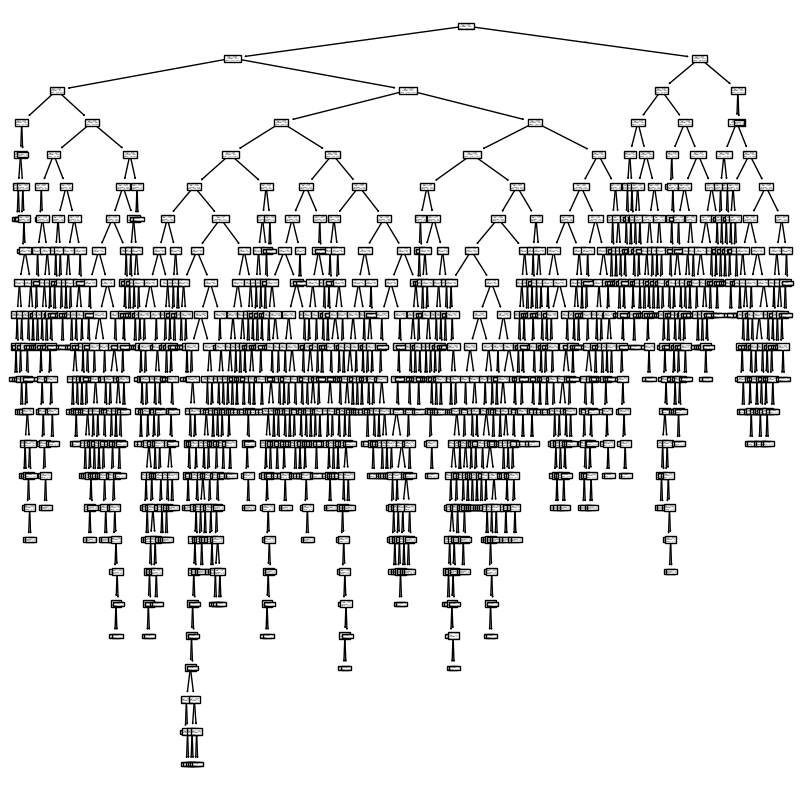

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()
